In [8]:
import numpy as np
import pandas as pd #이건 필없음.
import tensorflow.compat.v1 as tf 
from tensorflow import keras
tf.enable_eager_execution(tf.ConfigProto(log_device_placement=True)) 

In [9]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

ModuleNotFoundError: No module named 'tensorflow.keras'

In [10]:
#MNIST -> Modified National Institute of Standards and Technology 
#손으로 쓴 숫자 0~9 까지의 데이터가 제공되는 데이터베이스. 
(x_train , y_train) , (x_test , y_test) = mnist.load_data()

print("x_train 데이터의 형태: ",x_train.shape)
print("x_train[0] 데이터의 형태: ",x_train[0].shape)
print("y_train 데이터의 형태: ",y_train.shape)

print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)
 

NameError: name 'mnist' is not defined

In [11]:
x_train[0].shape #60000개중 1개의 이미지의 28, 28

NameError: name 'x_train' is not defined

In [5]:
#B H W  이미지에 대한 차원 표기법. 
# B -> 배치 사이즈  , 
# H -> 높이
# W -> 폭

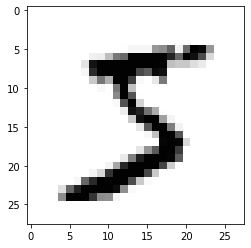

In [6]:
plt.imshow(x_train[0],cmap="Greys")
plt.show()

In [7]:
y_train[0]

5

In [8]:
from tensorflow.keras.layers import Input , Flatten , Dense
from tensorflow import keras

x_train , x_test = x_train / 255 , x_test / 255   #이게 정규화 (이미지는 정규화가 이렇게 간단함)

inputs = Input(shape=(28, 28))

x = Flatten()(inputs)
x = Dense(256 , activation ="relu")(x)
outputs = Dense(10, activation ="softmax")(x)

model = keras.Model( inputs = inputs , outputs = outputs )
model.compile(optimizer = "adam" , loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(x_train , y_train , epochs = 10)
model.summary()

Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:DML:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:DML:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:DML:0
Executing op Add in device /job:localhost/replica:0/task:0/device:DML:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:DML:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:DML:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:DML:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:DML:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:DML:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:DML:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:DML:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:DML:0
Executing op VarHandleOp in device /job:localhost/replica:0/tas

In [9]:
eval_loss , eval_acc  = model.evaluate(x_test , y_test)
print("테스트 손실값 : ",eval_loss)
print("테스트 정확도 : ",eval_acc)

Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ConcatenateDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Pack in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __

테스트 손실값 :  0.07870164425303883
테스트 정확도 :  0.9796001


In [10]:
# i = 1, ..., k 일때  a(zi) e^zi/ sum^K j=1 * e^zj 

# 소프트 맥스 랑 다른 거랑 차이점은 특이하게 어떤노드 i 번째 노드를 구하는 과정에 i에 대해 쓰이는게 아니라 1번부터 k 번까지 쓰임.
# 계산될때 개별적으로 계산되는게 아니고 나머지가 다 고정이고 하나의 값만 변한다고 하면 다른활성화함수는 그것 한개만 변함 그러나
# 소프트 맥스는 다변함 -> 비율을 구하는것 이니깐.
# 원-핫 인코딩
# 레이블이 5가지가 있다고 했을때
#       0        1        2        3       4
# 0     1        0        0        0       0
# 0     0        1        0        0       0
# 0     0        0        1        0       0
# 0     0        0        0        1       0
# 0     0        0        0        0       1


# 정답으로 0 , 1..,4 를주면 예측결과랑 정답이랑 오차를 이용해서 학습을 이용하는 방식이였는데
# 이거 이대로 나두면 원래 정답이 1인데 0으로 예측했을때 이때의 오차는 1 , 정답이 4 인데 예측이0 이면
# 오차가 4 로 뭘로 해서 오차가 틀렸는지가 되면 안된다.

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

data =np.array([0,1,2,3,4])
print("인코딩할 원본" , data)
encoded = to_categorical(data)
print("원 핫 인코딩된 데이터" )
print(encoded)

#이 거 안씀 ! -> 전처리 단계에서 원핫으로 해줬는데 탠서플로우에서 내부에서 알아서 골라줌(원핫인코딩해줌).
                #sparse_cartegorical_crossentropy -> 0,1 만있을때는 쓰면안됨. (다중분류할때만써야함)

인코딩할 원본 [0 1 2 3 4]
원 핫 인코딩된 데이터
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


 BCE (Binary Cross Entropy) 손실 함수의 일반적인 수식 

BCE = -∑[t * log(y) + (1-t) * log(1-y)]

여기서 t는 실제 타깃 값이고, y는 예측 값입니다. 
손실 함수를 사용하여 이진 분류 문제에서 모델의 예측과 실제 타깃 값 사이의 오차를 측정할 수 있습니다.
이 함수는 예측 값이 타깃 값과 가까울수록 손실이 작아지며, 멀어질수록 손실이 커집니다.

주의할 점은 t와 y는 0 또는 1의 값을 가져야 한다는 것입니다. 또한, log는 자연로그를 의미합니다. 
따라서 t와 y는 0과 1 사이의 값이며, 0이나 1에 가까울수록 손실이 작아집니다.

-----------------------------------------------------------------------------------------------------

BCE (Binary Cross Entropy) 손실 함수에서 타깃 값이 1인 경우에 대한 수식 

BCE = -∑[t * log(y) + (1-t) * log(1-y)]

만약 타깃 값인 t가 1이라면 첫 번째 항이 적용됩니다:

BCE = -∑[1 * log(y) + (1-1) * log(1-y)]
= -∑[log(y)]

따라서 타깃 값이 1인 경우 BCE 손실 함수는 -log(y)로 단순화됩니다.


log 1==> 0이 됨 (밑에 사진)

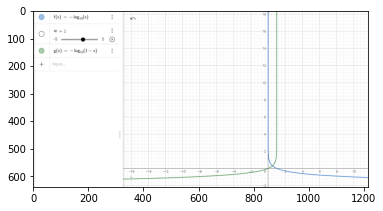

In [12]:
from PIL import Image
image_path = "C:/Users/carlo/Desktop/AI_CWNU/documents/aaa.png"  
image = Image.open(image_path) 
plt.imshow(image)
plt.show()


만약에 t = 0 ->  BCE = -∑[t * log(y) + (1-t) * log(1-y)]  ->
               = BCE = -∑[0 * log(y) + (1-0) * log(1-y)] ->
               = BCE = 0 + 1 * log(1-y) ->
                     = -∑log(1-y)

틀리면 손실함수를 무한대로 보내버리곘다는 뜻

In [13]:
from tensorflow.keras.layers import Input , Flatten , Dense
from tensorflow import keras

x_train , x_test = x_train / 255 , x_test / 255   #이게 정규화 (이미지는 정규화가 이렇게 간단함)
inputs = Input(shape=(28, 28))

x = Flatten()(inputs)
x = Dense(64 , activation ="relu")(x)
x = Dense(64 , activation ="relu")(x)
x = Dense(64 , activation ="relu")(x)
outputs = Dense(10, activation ="softmax")(x)

model = keras.Model( inputs = inputs , outputs = outputs )
model.compile(optimizer = "adam" , loss = "sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:DML:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:DML:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:DML:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:DML:0
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
den

In [14]:

model.fit(x_train , y_train , epochs = 10, batch_size = 128 , validation_split=0.2)

# 자동으로 8:2 비율로 분할해줌. 알아서 검증을 진행.  #장점 -> 미리분할을해서 넣어서 해주는것보단
# 좋은 이유는 간단하다는 장점, 매번 validation진행할때마다 매번 새로뽑음. K 겹 교차검증 학습데이터랑
# 검증데이터랑 분할해놓고 보면 비슷하게 생긴애들만 운나쁘게 걸리면 골고루 검증을 할수있게 그러나 validation_split 하면
# 매 step 마다 골고루 검증셋을 새로뽑기 때문에 K겹교차 검증이 자동으로 일어나게 됨!

Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op UnbatchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:lo

드롭 아웃 혹은 희석화 라고도 하는 이방법은 오버피팅 문제를 해결하는데 대안 

특정노드를 외우지않게 하기 위함.

In [15]:

from tensorflow.keras.layers import Input , Flatten , Dense , Dropout
from tensorflow import keras

x_train , x_test = x_train / 255 , x_test / 255
inputs = Input(shape=(28, 28))

x = Flatten()(inputs)
x = Dense(64 , activation ="relu")(x)
x = Dropout(0.2)(x)
x = Dense(64 , activation ="relu")(x)
x = Dropout(0.2)(x)
x = Dense(64 , activation ="relu")(x)
x = Dropout(0.2)(x)
outputs = Dense(10, activation ="softmax")(x)

model = keras.Model( inputs = inputs , outputs = outputs )
model.compile(optimizer = "adam" , loss = "sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160

In [16]:
model.fit(x_train , y_train , epochs = 10, batch_size = 128 , validation_split=0.2)

Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:l

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

stopper = EarlyStopping(monitor= "val_loss" , patience = 5 , mode='auto' , restore_best_weights=True ) 
#5Epoch 까진 올라가도 그래도 올라가면 그때 끊음. 2~3 폭올라가다가 떨어지면 그 인내심을 초기화하고 
#  ★★★★
model.fit( x_train , y_train , epochs = 20, batch_size = 128 , validation_split=0.2 , callbacks = [stopper] , verbose = 1) 
#verbose 메세지 뛰울지 안띄울지 0, 1진행바(디폴트), 2 에폭1줄


#지켜보다가 끊어주는 것 
#val_loss 가 점점 줄어들가다 갑자기 올라가는 부분 이렇게 하면 과대적합 되기 직전에 멈춰줌 -> 최대성능으로

Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/rep

In [20]:
#모델 불러오기 day5 것 

model = tf.keras.models.load_model("models/mnist_cnn.h5")
model.summary()


Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:DML:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:DML:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:DML:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:DML:0
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:DML:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:DML:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:DML:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:DML:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:DML:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:DML:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:DML:0
Executing op VarHandleOp in